<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/MB99_check_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos tempos dos estímulos do experimento

Os tempos dos estímulos, tanto para a condição de Ocitocina como de Controle, apresentam mais de 15% de *outliers* para mais da metade dos estímulos e mais de 20% de *outliers* para mais da metade dos pacientes e **pode comprometer bastante o resultado do agrupamento das tomadas de cada paciente**. 

Note que são *outliers*, assim há muito mais desvios, mas aqui são contabilizados somente os devios que podem ser considerados anomalias nos dados (*outliers*) e, mesmo assim, o percentual é expressivo. 




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/fNIRS/raw/main/tempo_fNIRS.csv',
                 skiprows=1,
                 nrows=39)
df.head()

,Participante,synBlc1_Oc,Descanso,asynBlc1_Oc,Descanso.1,ContBlc1_Oc,Descanso.2,synBlc2_Oc,Descanso.3,ContBlc2_Oc,...,ContBlc8_P,Descanso.46,asynBlc8_P,Descanso.47,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,1,40,51,40,50,40,50,41,50,40,...,40.0,50.0,40.0,50.0,40,91,131,181,221,271
1,2,40,50,40,50,40,50,40,50,40,...,NaN,NaN,NaN,NaN,40,90,130,180,220,270
2,3,40,50,40,50,40,50,40,50,40,...,52.0,42.0,40.0,50.0,40,90,130,180,220,270
3,4,40,56,40,50,40,49,40,50,42,...,40.0,40.0,41.0,50.0,40,96,136,186,226,275
4,5,40,57,40,50,40,50,41,50,40,...,40.0,51.0,40.0,50.0,40,97,137,187,227,277


In [ ]:
df.at[24,'ContBlc5_Oc']

'28 (em 12 teve pincel)'

In [ ]:
df.at[24,'ContBlc5_Oc'] = 28

In [ ]:
df.isnull().sum().sum()

11

In [ ]:
df.iloc[ [index for index, row in df.iterrows() if row.isnull().any()] ]

,Participante,synBlc1_Oc,Descanso,asynBlc1_Oc,Descanso.1,ContBlc1_Oc,Descanso.2,synBlc2_Oc,Descanso.3,ContBlc2_Oc,...,ContBlc8_P,Descanso.46,asynBlc8_P,Descanso.47,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
1,2,40,50,40,50,40,50,40,50,40,...,NaN,NaN,NaN,NaN,40,90,130,180,220,270


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.isnull().sum().sum()

0

In [ ]:
df.head()

,Participante,synBlc1_Oc,Descanso,asynBlc1_Oc,Descanso.1,ContBlc1_Oc,Descanso.2,synBlc2_Oc,Descanso.3,ContBlc2_Oc,...,ContBlc8_P,Descanso.46,asynBlc8_P,Descanso.47,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,1,40,51,40,50,40,50,41,50,40,...,40.0,50.0,40.0,50.0,40,91,131,181,221,271
1,3,40,50,40,50,40,50,40,50,40,...,52.0,42.0,40.0,50.0,40,90,130,180,220,270
2,4,40,56,40,50,40,49,40,50,42,...,40.0,40.0,41.0,50.0,40,96,136,186,226,275
3,5,40,57,40,50,40,50,41,50,40,...,40.0,51.0,40.0,50.0,40,97,137,187,227,277
4,6,40,52,40,50,40,47,40,50,40,...,40.0,50.0,41.0,50.0,40,92,132,182,222,269


In [ ]:
for c in df:
  df[c] = df[c].astype('int64')

In [ ]:
df_O = df[ df.columns[0:49] ]
df_P = pd.concat( [df[['Participante']], df[ df.columns[49:49+48]] ], axis=1)
          
display(df_O.head())
display(df_P.head())

,Participante,synBlc1_Oc,Descanso,asynBlc1_Oc,Descanso.1,ContBlc1_Oc,Descanso.2,synBlc2_Oc,Descanso.3,ContBlc2_Oc,...,asynBlc7_Oc,Descanso.19,ContBlc7_Oc,Descanso.20,synBlc8_Oc,Descanso.21,ContBlc8_Oc,Descanso.22,asynBlc8_Oc,Descanso.23
0,1,40,51,40,50,40,50,41,50,40,...,40,50,40,50,40,47,40,50,40,49
1,3,40,50,40,50,40,50,40,50,40,...,40,50,40,50,40,50,40,50,40,50
2,4,40,56,40,50,40,49,40,50,42,...,42,50,41,49,40,46,41,50,40,50
3,5,40,57,40,50,40,50,41,50,40,...,40,50,40,50,40,50,40,51,41,50
4,6,40,52,40,50,40,47,40,50,40,...,40,50,40,57,40,50,40,45,40,50


,Participante,synBlc1_P,Descanso.24,asynBlc1_P,Descanso.25,ContBlc1_P,Descanso.26,synBlc2_P,Descanso.27,ContBlc2_P,...,asynBlc7_P,Descanso.43,ContBlc7_P,Descanso.44,synBlc8_P,Descanso.45,ContBlc8_P,Descanso.46,asynBlc8_P,Descanso.47
0,1,40,50,40,50,40,50,40,50,40,...,40,50,40,51,41,50,40,50,40,50
1,3,40,50,40,50,40,50,40,50,40,...,45,51,40,50,40,50,52,42,40,50
2,4,40,50,40,50,40,50,40,50,40,...,40,50,40,50,40,50,40,40,41,50
3,5,40,57,40,50,40,50,41,50,40,...,40,50,40,50,40,50,40,51,40,50
4,6,40,50,40,50,40,50,40,50,40,...,40,50,40,50,40,50,40,50,41,50


In [ ]:
def get_desvios_estimulo(df):
  desvios = {}
  for c in df.drop(columns='Participante'):
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    desvios[c] = [ df[ (df[c] < q1 - 1.5*iqr) | (df[c] > q3 + 1.5*iqr) ][c].count() / len(df) ]

  desvios = pd.DataFrame(desvios)
  return desvios

desvios_e_O = get_desvios_estimulo(df_O)
display(desvios_e_O)

desvios_e_P = get_desvios_estimulo(df_P)
display(desvios_e_P)



,synBlc1_Oc,Descanso,asynBlc1_Oc,Descanso.1,ContBlc1_Oc,Descanso.2,synBlc2_Oc,Descanso.3,ContBlc2_Oc,Descanso.4,...,asynBlc7_Oc,Descanso.19,ContBlc7_Oc,Descanso.20,synBlc8_Oc,Descanso.21,ContBlc8_Oc,Descanso.22,asynBlc8_Oc,Descanso.23
0,0.0,0.210526,0.026316,0.131579,0.026316,0.184211,0.131579,0.0,0.157895,0.157895,...,0.078947,0.105263,0.105263,0.131579,0.0,0.184211,0.157895,0.210526,0.157895,0.052632


,synBlc1_P,Descanso.24,asynBlc1_P,Descanso.25,ContBlc1_P,Descanso.26,synBlc2_P,Descanso.27,ContBlc2_P,Descanso.28,...,asynBlc7_P,Descanso.43,ContBlc7_P,Descanso.44,synBlc8_P,Descanso.45,ContBlc8_P,Descanso.46,asynBlc8_P,Descanso.47
0,0.078947,0.0,0.210526,0.236842,0.026316,0.263158,0.157895,0.105263,0.184211,0.236842,...,0.105263,0.210526,0.105263,0.157895,0.105263,0.131579,0.078947,0.131579,0.131579,0.0


# Outliers de tempo por estímulo

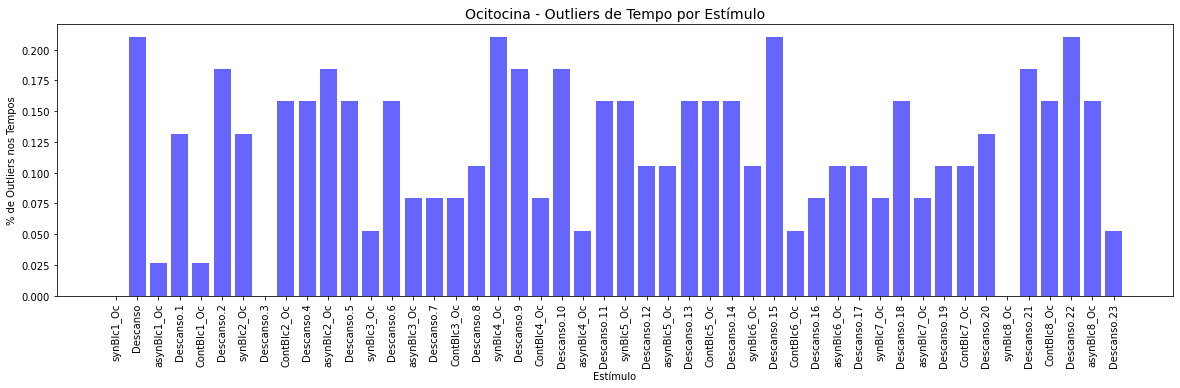

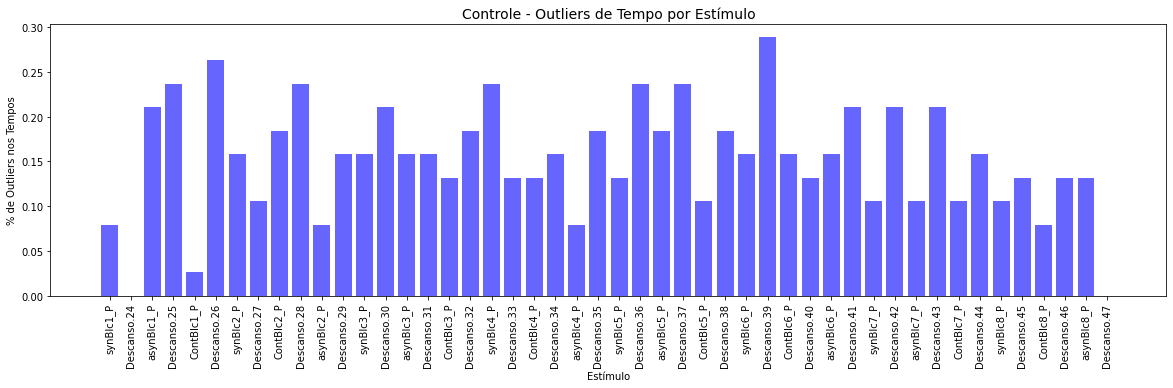

In [ ]:
def plot_desvios_estimulo(desvios,title):
  fig, ax = plt.subplots(figsize=(20,5))

  i = 0
  for c in desvios:
    plt.bar(i,desvios[c],color='b',alpha=0.6)
    i = i + 1

  plt.xticks(np.arange(0, len(desvios.columns)), labels=desvios.columns,rotation=90)  
  plt.title(title, fontsize=14)
  plt.xlabel('Estímulo')
  plt.ylabel('% de Outliers nos Tempos')
  plt.show()
  return

plot_desvios_estimulo(desvios_e_O,'Ocitocina - Outliers de Tempo por Estímulo')
plot_desvios_estimulo(desvios_e_P,'Controle - Outliers de Tempo por Estímulo')



In [ ]:
def get_desvios_paciente(df):
  desvios_u = {}
  for c in df.drop(columns='Participante'):
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    for _ , row in df.iterrows():
      # print(int(row['Participante']))
      if (row[c] < q1 - 1.5*iqr) or (row[c] > q3 + 1.5*iqr):
        if int(row['Participante']) in desvios_u.keys():
          desvios_u[int(row['Participante'])] = [ desvios_u[int(row['Participante'])][0] + 1 ]
        else:
          desvios_u[int(row['Participante'])] = [ 1 ] 
  
  desvios_u = pd.DataFrame(desvios_u)
  desvios_u = desvios_u[ desvios_u.columns.sort_values() ] # order by columns
  desvios_u = desvios_u / len(desvios_u.columns) # get % 
  return desvios_u

desvios_p_O = get_desvios_paciente(df_O)
display(desvios_p_O)

desvios_p_P = get_desvios_paciente(df_P)
display(desvios_p_P)

,1,3,4,5,6,7,8,9,10,11,...,23,24,25,26,30,31,36,37,38,39
0,0.333333,0.1,0.8,0.366667,0.3,0.266667,0.133333,0.333333,0.433333,0.566667,...,0.033333,0.166667,0.033333,0.066667,0.1,0.166667,0.066667,0.066667,0.2,0.6


,1,3,4,5,6,7,8,9,10,11,...,27,28,29,30,33,34,36,37,38,39
0,0.1875,0.21875,0.125,0.25,0.15625,0.34375,0.15625,0.8125,0.46875,0.4375,...,0.21875,0.8125,0.09375,0.0625,0.0625,0.09375,0.8125,0.125,0.28125,0.59375


# Outliers de tempo por paciente

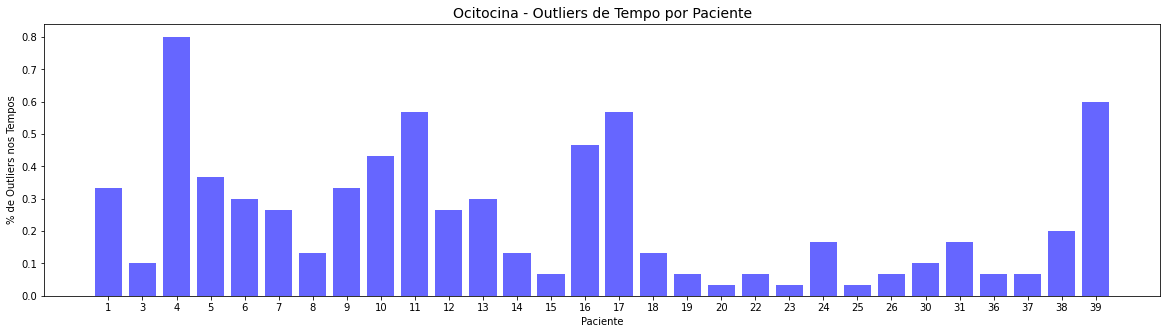

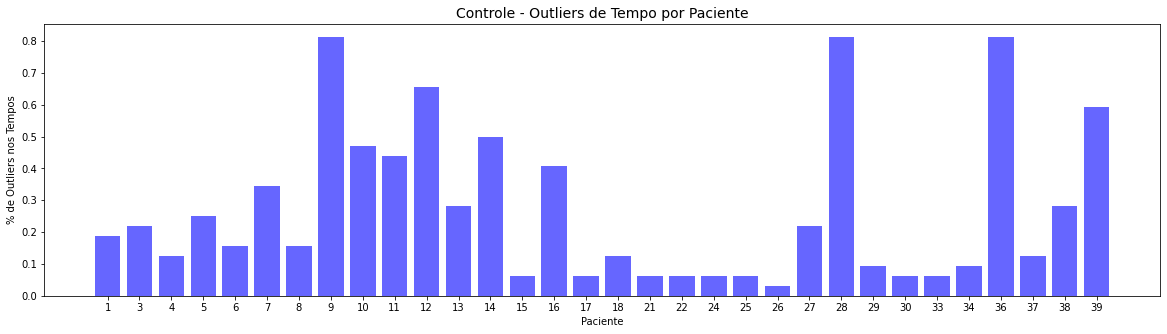

In [ ]:
def plot_desvios_paciente(desvios_u,title):
  fig, ax = plt.subplots(figsize=(20,5))

  i = 0
  for c in desvios_u:
    plt.bar(i,desvios_u[c],color='b',alpha=0.6)
    i = i + 1

  plt.xticks(np.arange(0, len(desvios_u.columns)), labels=desvios_u.columns)  
  plt.title(title, fontsize=14)
  plt.xlabel('Paciente')
  plt.ylabel('% de Outliers nos Tempos')
  plt.show()
  return 

plot_desvios_paciente(desvios_p_O,'Ocitocina - Outliers de Tempo por Paciente')
plot_desvios_paciente(desvios_p_P,'Controle - Outliers de Tempo por Paciente')
